In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 

from matplotlib import pyplot as plt
import seaborn as sn


In [8]:
df = pd.read_csv('fake_and_real_news.csv')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [10]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [12]:
le = LabelEncoder()

df['label_num'] = le.fit_transform(df['label'])
df.head(10)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
5,France says pressure needed to stop North Kore...,Real,1
6,"Trump on Twitter (August 8): Opioid crisis, No...",Real,1
7,BUSTED: Trump Supporter Used Poll Watcher Cre...,Fake,0
8,Fatal Niger operation sparks calls for public ...,Real,1
9,Trump says he has 'great heart' for immigrant ...,Real,1


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.Text.values,df.label_num.values, test_size=0.2,stratify=df.label_num)

In [17]:
print(X_train.shape)
print(X_test.shape)

(7920,)
(1980,)


### Using KNN classifiers 
#### n_grams(3) 
#### cosine distance 

In [19]:
knnpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(1,3))),
        ('KNN', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
    ]
)

knnpipe.fit(X_train,y_train)


y_pred = knnpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.53      0.69      1000
           1       0.67      1.00      0.80       980

    accuracy                           0.76      1980
   macro avg       0.83      0.76      0.75      1980
weighted avg       0.84      0.76      0.75      1980



### Using KNN classifiers 
#### unigram, bigram, and trigrams. 
#### Euclidean distance 


In [21]:
knnpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(1,3))),
        ('KNN', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
    ]
)

knnpipe.fit(X_train,y_train)


y_pred = knnpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.52      0.67      1000
           1       0.67      0.97      0.79       980

    accuracy                           0.74      1980
   macro avg       0.80      0.75      0.73      1980
weighted avg       0.81      0.74      0.73      1980



### Using Random Forest classifier  - trigrams

In [25]:
rfcpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(3,3))),
        ('RFC', RandomForestClassifier(n_estimators=10)) #Default estimators
    ]
)

rfcpipe.fit(X_train,y_train)


y_pred = rfcpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1000
           1       0.98      0.97      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



### Using Multinomial Naive Bayes - unigram, bigram

In [27]:


mnbpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(1,2))),
        ('mnb', MultinomialNB())
    ]
)

mnbpipe.fit(X_train,y_train)


y_pred = mnbpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



### Using pre-processing 
- remove stop words
-  punctuations
-  lemmatization

In [28]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [29]:
df["preprocessed_text"] = df["Text"].apply(preprocess)

In [30]:
df["preprocessed_text"]

0         Trump Surrogate BRUTALLY Stabs Pathetic vide...
1       U.S. conservative leader optimistic common gro...
2       trump propose U.S. tax overhaul stir concern d...
3         Court Forces Ohio allow million illegally pu...
4       Democrats Trump agree work immigration bill wa...
                              ...                        
9895      Wikileaks admit screw IMMENSELY Twitter Poll...
9896    trump consult republican senator Fed chief can...
9897    trump lawyer judge lack jurisdiction defamatio...
9898      WATCH Right Wing Pastor Falsely Credits Trum...
9899      Sean Spicer HILARIOUSLY Branded chickensh*t ...
Name: preprocessed_text, Length: 9900, dtype: object

In [31]:


X_train,X_test,y_train,y_test = train_test_split(df.preprocessed_text.values,df.label_num.values, test_size=0.2,stratify=df.label_num)

### Using Random Forest Classifier on Preprocessed Text - trigrams

In [34]:
rfcpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(3,3))),
        ('RFC', RandomForestClassifier(n_estimators=10)) #Default estimators
    ]
)

rfcpipe.fit(X_train,y_train)


y_pred = rfcpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1000
           1       0.98      0.88      0.92       980

    accuracy                           0.93      1980
   macro avg       0.93      0.93      0.93      1980
weighted avg       0.93      0.93      0.93      1980



### Using Random Forest Classifier on Preprocessed Text - unigram, bigram

In [35]:
rfcpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(1,2))),
        ('RFC', RandomForestClassifier(n_estimators=10)) #Default estimators
    ]
)

rfcpipe.fit(X_train,y_train)


y_pred = rfcpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1000
           1       0.99      0.97      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



### Using Random Forest Classifier on Preprocessed Text - unigram, bigram,trigram

In [36]:
rfcpipe = Pipeline(
    [
        ('Tri_gram_vector', CountVectorizer(ngram_range=(1,3))),
        ('RFC', RandomForestClassifier(n_estimators=10)) #Default estimators
    ]
)

rfcpipe.fit(X_train,y_train)


y_pred = rfcpipe.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1000
           1       0.99      0.97      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(95.72222222222221, 0.5, 'Truth')

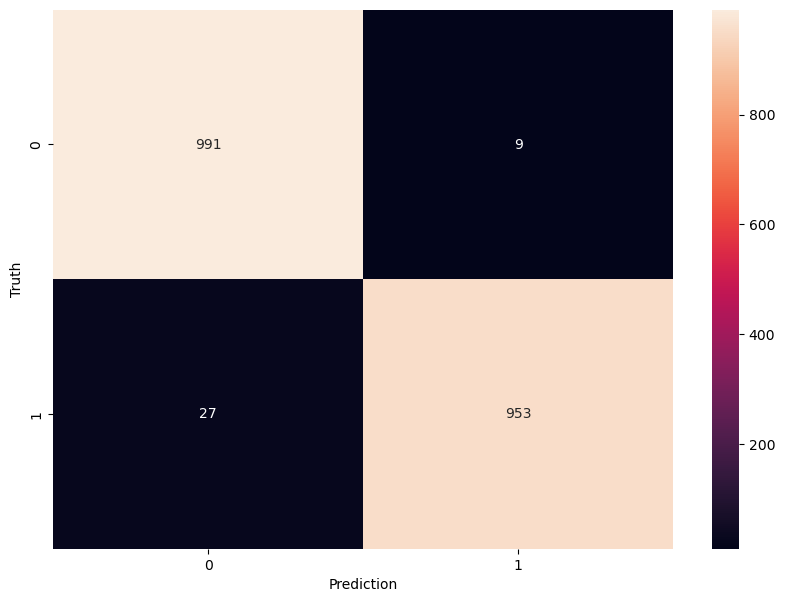

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm



plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')